### Predição de flores

Saber qual espécie de flor pode ser um trabalho desgantante a primeira vista, como podemos saber sem olhar diretamente ? a resposta está em algo simples e poderoso, dados. Vamos predizer com os dados das sépalas e petálas. Para isso utilizaremos um algoritmo presente no cotidiano, a árvore de decisão, pegamos perguntas gerais até específicas para chegarmos a nossa conclusão de qual espécie de flor é, como nosso bom e velho akinator

In [34]:
# Importação das bibliotecas
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

In [35]:

# Carrega o dataset Iris com as opções padrão
iris = load_iris()

# Cria um DataFrame com os dados das características
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Adiciona a coluna com as classes (alvo)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Exibe as primeiras linhas do DataFrame
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [36]:
# ùltima linhas do dataset 
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [37]:
# Primeira linhas do dataset
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [38]:
df.shape

(150, 5)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [40]:
df.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [41]:
df.value_counts()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  species  
5.8                2.7               5.1                1.9               virginica    2
4.4                2.9               1.4                0.2               setosa       1
                   3.0               1.3                0.2               setosa       1
                   3.2               1.3                0.2               setosa       1
4.3                3.0               1.1                0.1               setosa       1
                                                                                      ..
7.7                2.6               6.9                2.3               virginica    1
                   2.8               6.7                2.0               virginica    1
                   3.0               6.1                2.3               virginica    1
                   3.8               6.7                2.2               virginica    1
7.9                3.8    

In [42]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [44]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

In [45]:
df_dados = df.copy()

# Tratamento as variaveis object

lb = LabelEncoder()

for variavel in ['species']:
    df_dados[variavel] = lb.fit_transform(df_dados[variavel])

df_dados

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [46]:
# correlação dos dados
df_dados.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
species,0.782561,-0.426658,0.949035,0.956547,1.000000


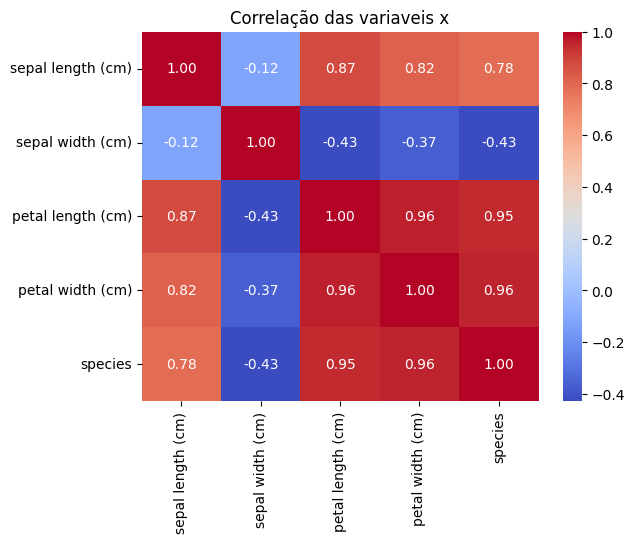

In [47]:
# correlação de forma grafica
import seaborn as sns
sns.heatmap(df_dados.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlação das variaveis x')
plt.show()

a matriz de correlação acima nos mostra que o largura da pétala é um fator determinante na determinação da espécia, porque apresenta correlação alta maior que 0.9

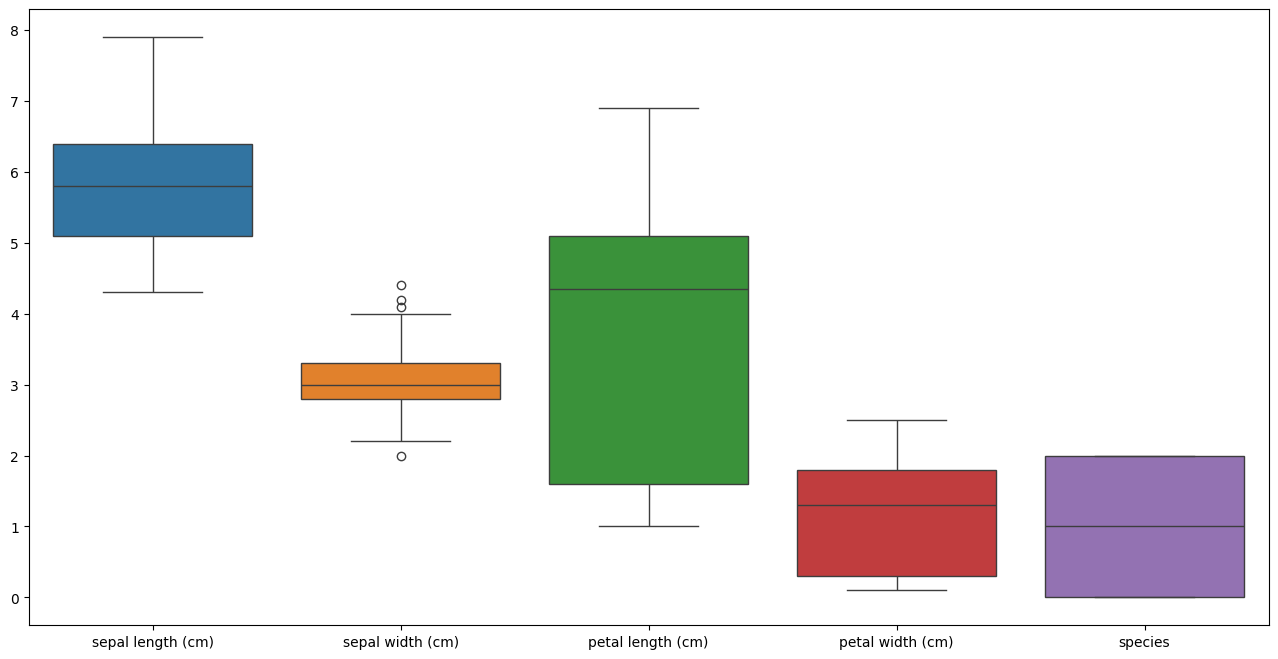

In [48]:
plt.figure(figsize=(16,8))
ax = sns.boxplot(data=df_dados)

In [49]:
Q1 = df_dados['sepal width (cm)'].quantile(0.25)
Q3 = df_dados['sepal width (cm)'].quantile(0.75)

IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print(f"Limite Inferior: {limite_inferior}")
print(f"Limite Superior: {limite_superior}")

Limite Inferior: 2.05
Limite Superior: 4.05


In [50]:

df_sem_outliers = df_dados[(df_dados['sepal width (cm)'] >= limite_inferior) & (df['sepal width (cm)'] <= limite_superior)]

print(f"Linhas antes: {len(df_dados)}")
print(f"Linhas depois: {len(df_sem_outliers)}")

# Verificando as primeiras linhas do DataFrame sem outliers
print(df_sem_outliers.head())

Linhas antes: 150
Linhas depois: 146
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


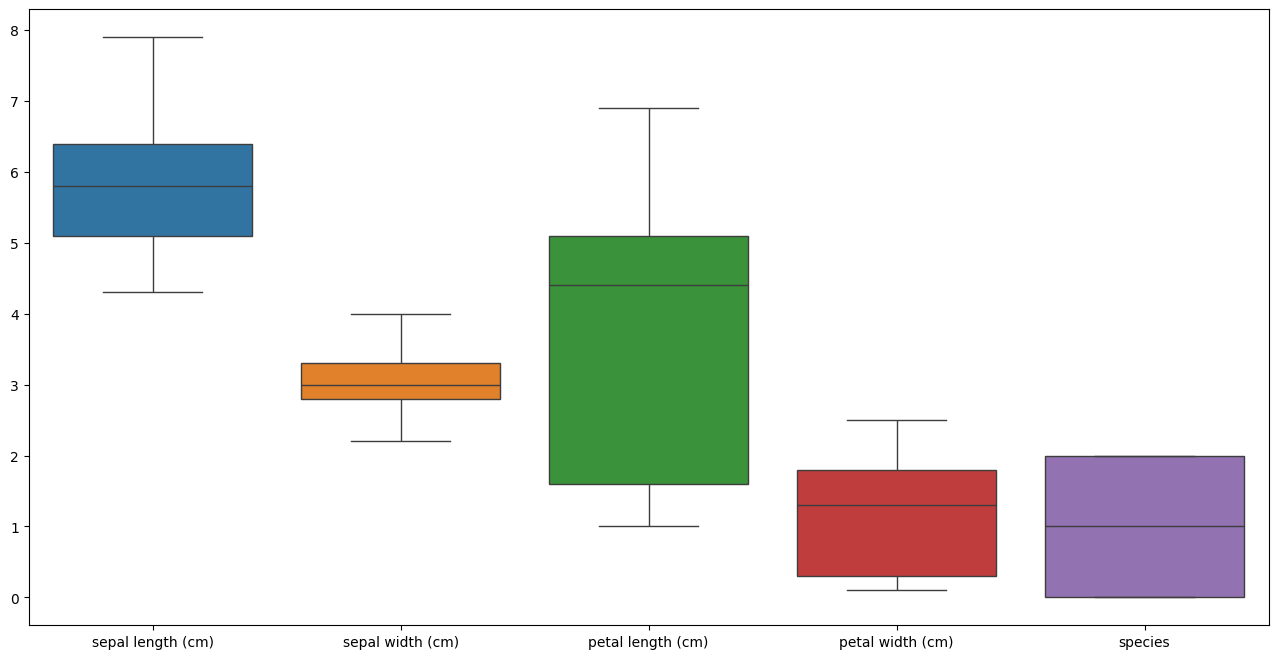

In [51]:
plt.figure(figsize=(16,8))
ax = sns.boxplot(data=df_sem_outliers)

In [52]:
# vamos fazer a padronização dos dados
padronizar = StandardScaler().fit(df_sem_outliers)

df_padronizado = padronizar.transform(df_sem_outliers)

In [53]:
df_padronizado = pd.DataFrame(df_padronizado)

df_padronizado.columns = df.columns

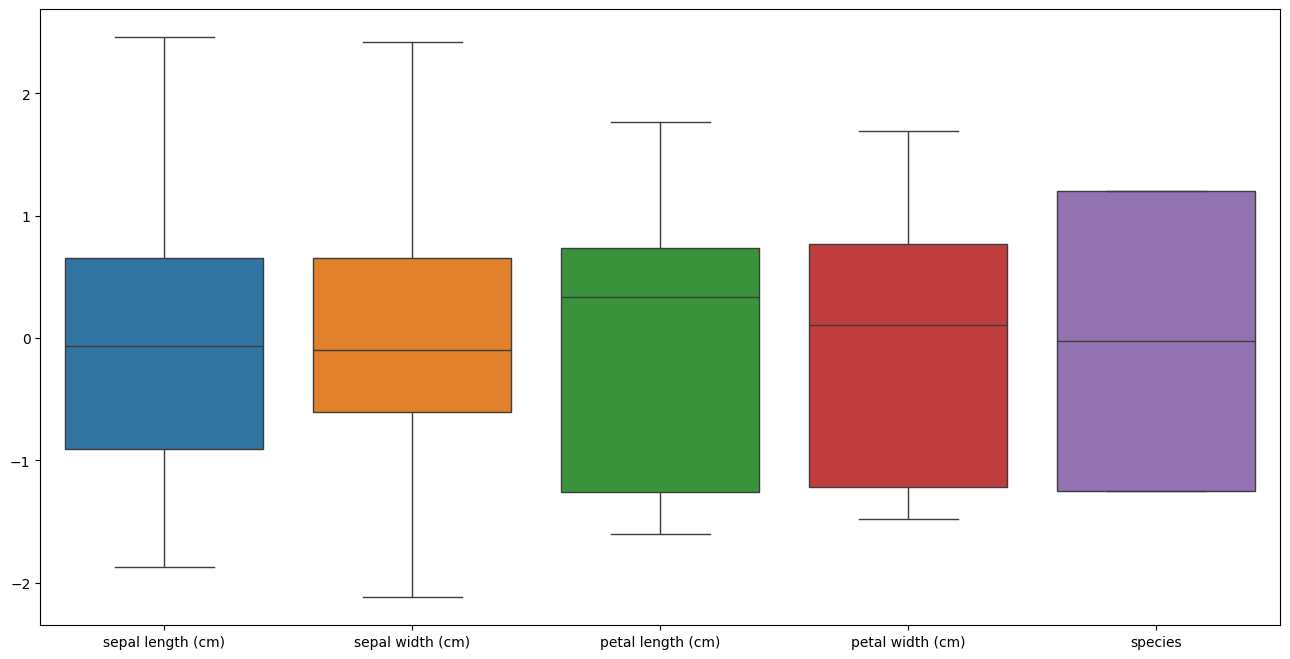

In [54]:
plt.figure(figsize=(16,8))
ax = sns.boxplot(data=df_padronizado)

In [55]:
variaveis_x = df_sem_outliers.drop('species', axis=1)

variavel_y = df_sem_outliers['species']

display(variavel_y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 146, dtype: int64

In [56]:
# Separando os dados em treino e teste, esse random_state é para fazer a auditoria depois, pega dez,
#  quando eu pegar de novo, voce vai me forncecer esses mesmo 10 escolhidos antes, é uma chave de criptografia

x_treino, x_teste, y_treino, y_teste = train_test_split(variaveis_x, variavel_y, test_size=0.3, random_state=10)

In [57]:
# Treinando o modelo

modelo = DecisionTreeClassifier()

modelo.fit(x_treino, y_treino)

DecisionTreeClassifier()

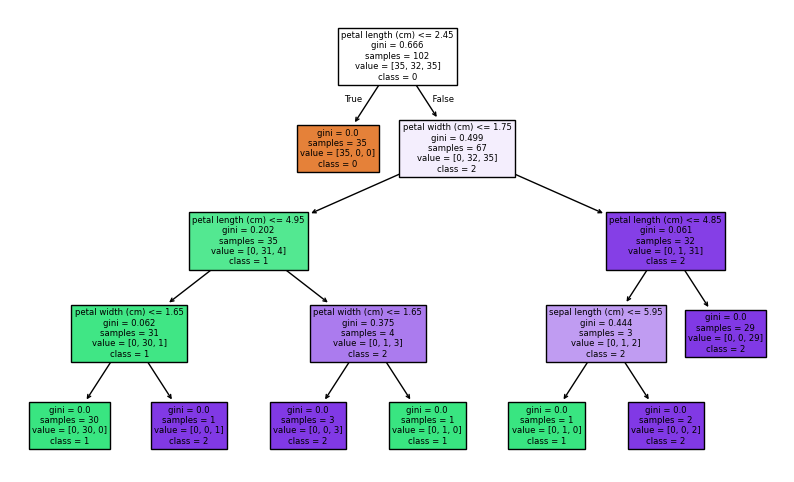

In [58]:
# Visualizar árvore
plt.figure(figsize=(10, 6))
plot_tree(modelo, feature_names=df_padronizado.columns, class_names=modelo.classes_.astype(str), filled=True)
plt.show()

In [59]:
# Avaliar 
y_pred = modelo.predict(x_teste)
print("Acurácia:", accuracy_score(y_teste, y_pred))

Acurácia: 0.9772727272727273


In [60]:
print(x_teste)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
144                6.7               3.3                5.7               2.5
101                5.8               2.7                5.1               1.9
56                 6.3               3.3                4.7               1.6
59                 5.2               2.7                3.9               1.4
88                 5.6               3.0                4.1               1.3
125                7.2               3.2                6.0               1.8
10                 5.4               3.7                1.5               0.2
25                 5.0               3.0                1.6               0.2
142                5.8               2.7                5.1               1.9
50                 7.0               3.2                4.7               1.4
89                 5.5               2.5                4.0               1.3
108                6.7               2.5                5.8     

Nosso modelo tem um acurácia de 97%, bom resultado não tivemos overfitting, devido ao tratamento adequado no processamento dos dados. O algoritmo de árvore de decisão se mostrou satisfatório e mostrou que de fato a largura é o comprimento da pétala são fatores importantes como já havia sido indicado pela matriz de corelação.

In [61]:
import pickle
with open('predict_flores.pkl', 'wb')as file:
    pickle.dump(modelo, file)